In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
os.chdir("/content/drive/MyDrive/DATA SCIENCE & ANALYSIS/8_Gaming_Behavior_Analytics")

In [4]:
os.listdir()

['online_gaming_behavior_insights.csv',
 'Online Gaming Behavior Analytics.ipynb']

## **DATASET**

**Link Dataset:**
https://www.kaggle.com/datasets/wasiqaliyasir/online-gaming-behavior-insight

**Dataset Description:**
1. PlayerID: Unique identifier assigned to each player
2. Age: Age of the player (numeric)
3. Gender: Gender of the player (Male / Female)
4. Location: Geographical region of the player (e.g., USA, Europe, Other)
5. GameGenre: Preferred game genre (Action, Strategy, Sports, etc.)
6. PlayTimeHours: Total hours spent playing games
7. InGamePurchases: Indicates whether the player made in-game purchases (0 = No, 1 = Yes)
8. GameDifficulty: Preferred difficulty level (Easy, Medium, Hard)
9. SessionsPerWeek: Average number of gaming sessions per week
10. AvgSessionDurationMinutes: Average duration of each gaming session in minutes
11. PlayerLevel: Current progression level of the player
12. AchievementsUnlocked: Total number of achievements unlocked by the player
13. EngagementLevel: Overall engagement classification (Low, Medium, High)

In [5]:
gaming_behavior_df = pd.read_csv("online_gaming_behavior_insights.csv")

In [6]:
gaming_behavior_df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [7]:
gaming_behavior_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [8]:
gaming_behavior_df["GameGenre"].unique()

array(['Strategy', 'Sports', 'Action', 'RPG', 'Simulation'], dtype=object)

In [9]:
gaming_behavior_df.isna().sum()

,0
PlayerID,0
Age,0
Gender,0
Location,0
GameGenre,0
PlayTimeHours,0
InGamePurchases,0
GameDifficulty,0
SessionsPerWeek,0
AvgSessionDurationMinutes,0


In [10]:
gaming_behavior_df.duplicated().sum()

np.int64(0)

In [11]:
gaming_behavior_df.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


## **VISUALIZATION**

**What is the age and gender distribution of players in the dataset?**

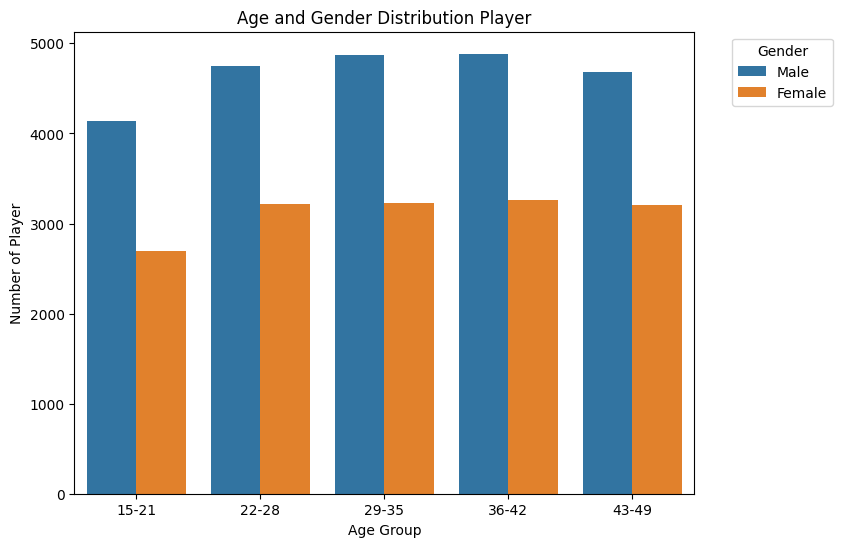

In [12]:
gaming_behavior_df["age_group"] = pd.cut(
    gaming_behavior_df["Age"],
    bins = [15, 21, 28, 35, 42, 49],
    labels = ["15-21", "22-28", "29-35", "36-42", "43-49"]
)

plt.figure(figsize = (8, 6))
sns.countplot(
    data = gaming_behavior_df,
    x = "age_group",
    hue = "Gender"
)

plt.title("Age and Gender Distribution Player")
plt.xlabel("Age Group")
plt.ylabel("Number of Player")
plt.legend(
    title = "Gender",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    labels = ["Male", "Female"]
)
plt.show()

**Conclusion:**

The chart shows that male players consistently outnumber female players across all age groups. The highest number of players is found in the 36–42 age group, followed closely by the 29–35 age group. Although the difference between these two groups is small, both represent the most active segments in the dataset. Overall, player participation increases from the younger age groups and peaks in middle adulthood before slightly declining in the oldest group.

This indicates that gaming activity is most prevalent among adults in their late 20s to early 40s, suggesting that players in this age range have both the time and sustained interest to engage more actively in gaming.

**Which game genres are most preferred by players?**

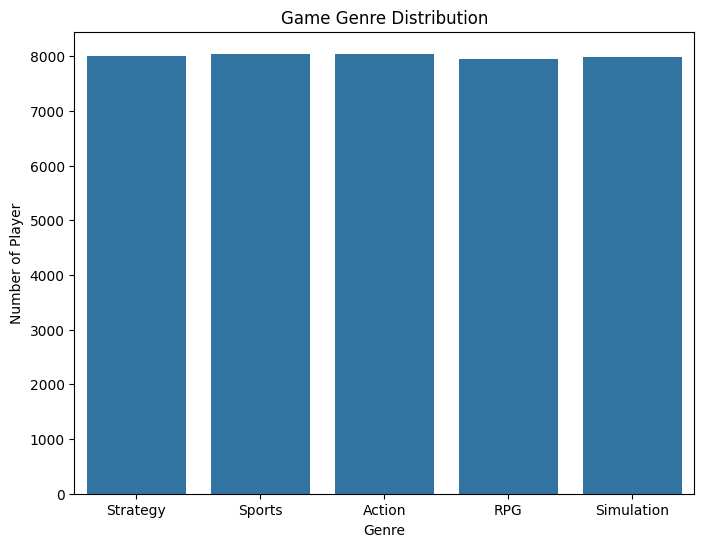

In [13]:
plt.figure(figsize = (8, 6))
sns.countplot(
    data = gaming_behavior_df,
    x = "GameGenre"
)

plt.title("Game Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Number of Player")
plt.show()

**Conclusion:**

The distribution of players by game genre is relatively even, with no significant differences in the number of players across genres. This indicates that players have diverse gaming preferences, and no single game genre overwhelmingly dominates the player base. It suggests that engagement is spread across multiple genres rather than being concentrated in one specific type of game

**How does player age and gender vary across different engagement levels?**

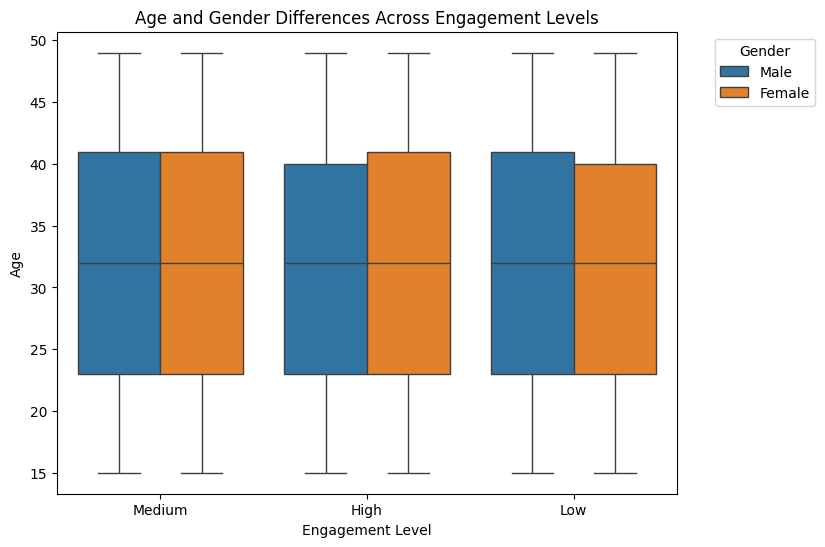

In [14]:
plt.figure(figsize = (8, 6))
sns.boxplot(
    data = gaming_behavior_df,
    x = "EngagementLevel",
    y = "Age",
    hue = "Gender"
)

plt.title("Age and Gender Differences Across Engagement Levels")
plt.xlabel("Engagement Level")
plt.ylabel("Age")
plt.legend(
    title = "Gender",
    bbox_to_anchor = (1.05, 1),
    loc = "upper left"
)

**Conclusion:**

The boxplot shows that the age distribution is relatively similar across all engagement levels (Low, Medium, and High) for both males and females.
The median age is around the early 30s in each engagement group, indicating that engagement level does not strongly differ by age.

Additionally, the spread of ages (variability) is comparable across engagement levels, meaning that younger and older users are present in all groups.
There are no major differences between males and females, as their age distributions largely overlap in every engagement level.

Overall, the boxplot suggests that engagement level is not significantly influenced by age or gender, and users of different ages and genders show similar engagement patterns.

**How does engagement level differ across geographical locations?**

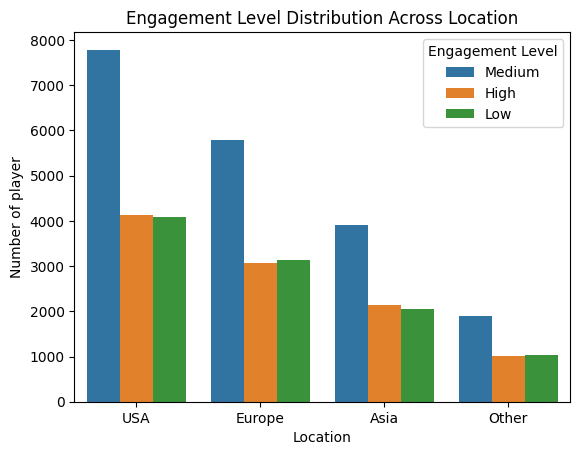

In [15]:
sns.countplot(
    data = gaming_behavior_df,
    x = "Location",
    hue = "EngagementLevel",
    order = gaming_behavior_df["Location"].value_counts().index
)

plt.title("Engagement Level Distribution Across Location")
plt.xlabel("Location")
plt.ylabel("Number of player")
plt.legend(title = "Engagement Level")
plt.show()

In [16]:
gaming_behavior_df["Location"].value_counts()

,count
Location,
USA,16000
Europe,12004
Asia,8095
Other,3935


**Conclusion:**

The chart shows that engagement levels differ across geographical locations, with the USA having the highest number of players in all engagement categories, particularly in the medium engagement level. Europe follows a similar pattern but with a smaller player base.

In Asia and other regions, the total number of players is lower, although medium engagement remains the most common level across all locations. This indicates that most players tend to show a moderate level of engagement regardless of geographical location, and regional differences are mainly reflected in the overall number of players rather than in engagement behavior.


**How does total play time (PlayTimeHours) relate to player engagement level?**

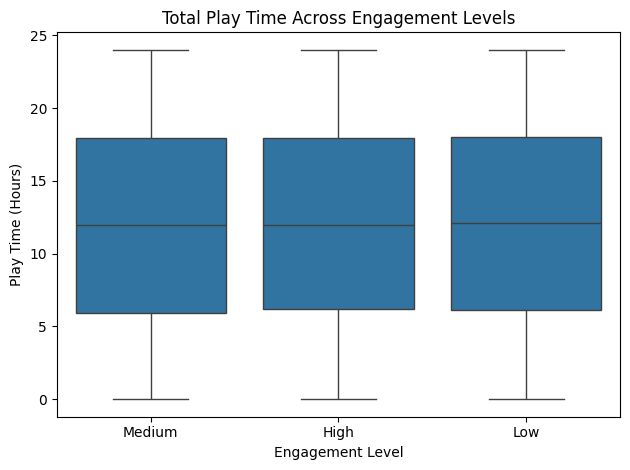

In [17]:
sns.boxplot(
    data = gaming_behavior_df,
    x = "EngagementLevel",
    y = "PlayTimeHours"
)

plt.title("Total Play Time Across Engagement Levels")
plt.xlabel("Engagement Level")
plt.ylabel("Play Time (Hours)")
plt.tight_layout()
plt.show()

**Conclusion:**

The boxplot indicates that total play time is relatively consistent across all engagement levels (Low, Medium, and High). The median play time and overall distribution are similar for each group, suggesting that players with different engagement levels spend roughly the same amount of time playing.

Overall, this suggests that total play time alone is not a strong indicator of player engagement, and engagement levels may be influenced by factors beyond just the amount of time spent playing.

**Is a higher number of sessions per week associated with higher engagement?**

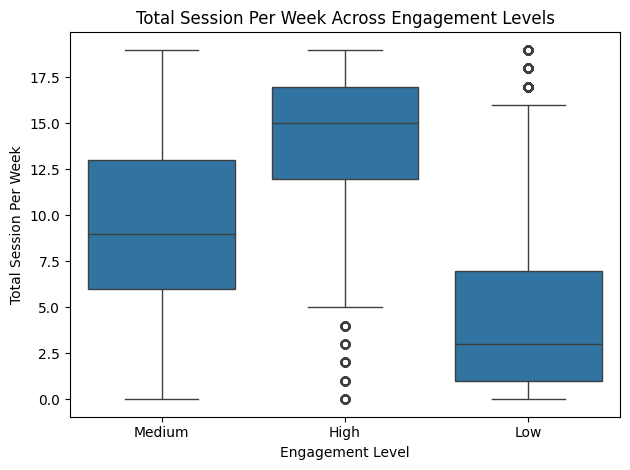

In [18]:
sns.boxplot(
    data = gaming_behavior_df,
    x = "EngagementLevel",
    y = "SessionsPerWeek"
)

plt.title("Total Session Per Week Across Engagement Levels")
plt.xlabel("Engagement Level")
plt.ylabel("Total Session Per Week")
plt.tight_layout()
plt.show()

**Conclusion:**

The boxplot shows clear differences in the number of weekly sessions across engagement levels. Players with high engagement have the highest median number of sessions per week, indicating more frequent gameplay. Players with medium engagement show a moderate number of sessions, while those with low engagement have the fewest weekly sessions.

Overall, this indicates that player engagement is strongly associated with how often players log in and play each week. In other words, the more frequently players play during the week, the higher their engagement level tends to be, with higher engagement levels corresponding to more frequent gaming sessions.

**How does average session duration differ across engagement levels?**

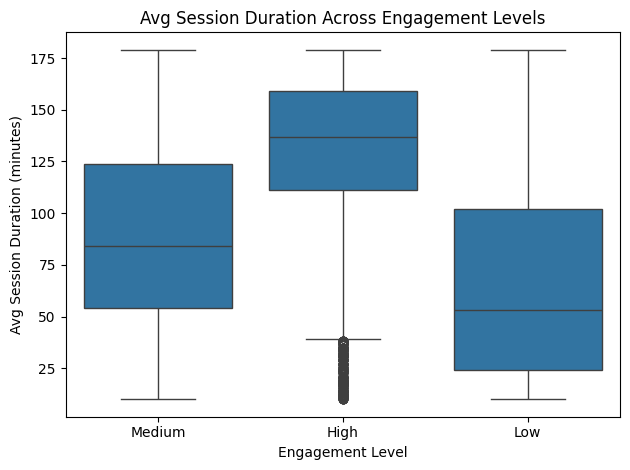

In [19]:
sns.boxplot(
    data = gaming_behavior_df,
    x = "EngagementLevel",
    y = "AvgSessionDurationMinutes"
)

plt.title("Avg Session Duration Across Engagement Levels")
plt.xlabel("Engagement Level")
plt.ylabel("Avg Session Duration (minutes)")
plt.tight_layout()
plt.show()

**Conclusion:**

The analysis shows that players with higher average session duration tend to have higher engagement levels. Players in the high engagement group spend more time per session compared to those in the medium and low engagement groups.

This indicates that engagement is influenced not only by how frequently players play, but also by how long they stay in each session. In other words, players who play more often and spend longer time in each session tend to have higher engagement levels, reflecting stronger involvement and commitment to the game.

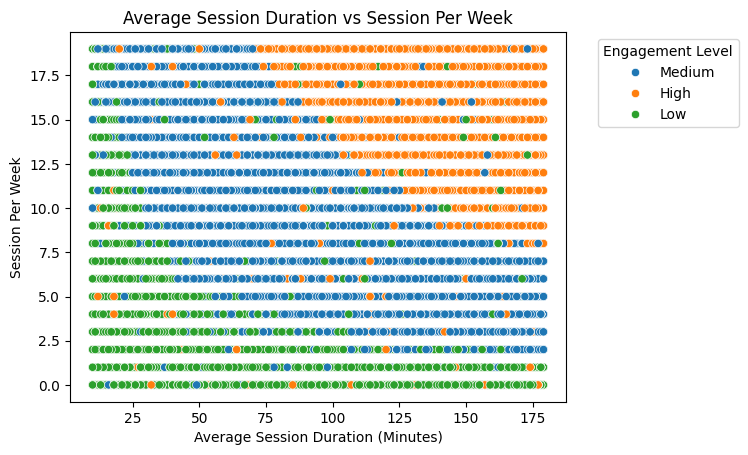

In [20]:
sns.scatterplot(
    data = gaming_behavior_df,
    x = "AvgSessionDurationMinutes",
    y = "SessionsPerWeek",
    hue = "EngagementLevel"
)

plt.title("Average Session Duration vs Session Per Week")
plt.xlabel("Average Session Duration (Minutes)")
plt.ylabel("Session Per Week")
plt.legend(
    title = "Engagement Level",
    bbox_to_anchor = (1.05, 1),
    loc = "upper left"
)
plt.show()

**Let’s take a deeper look at PlayTimeHours, AvgSessionDurationMinutes, and SessionsPerWeek to see whether there is a relationship among them.**

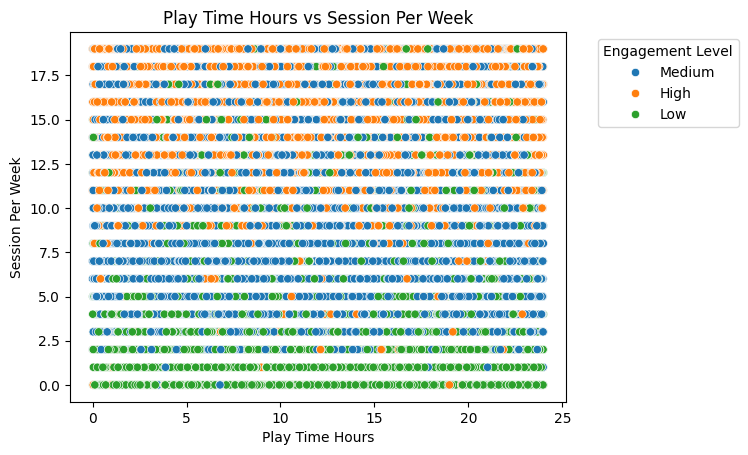

In [21]:
sns.scatterplot(
    data = gaming_behavior_df,
    x = "PlayTimeHours",
    y = "SessionsPerWeek",
    hue = "EngagementLevel"
)

plt.title("Play Time Hours vs Session Per Week")
plt.xlabel("Play Time Hours")
plt.ylabel("Session Per Week")
plt.legend(
    title = "Engagement Level",
    bbox_to_anchor = (1.05, 1),
    loc = "upper left"
)
plt.show()

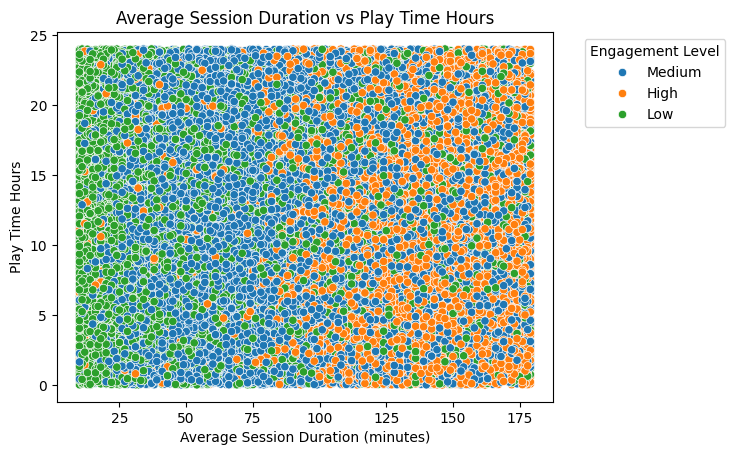

In [22]:
sns.scatterplot(
    data = gaming_behavior_df,
    x = "AvgSessionDurationMinutes",
    y = "PlayTimeHours",
    hue = "EngagementLevel"
)

plt.title("Average Session Duration vs Play Time Hours")
plt.xlabel("Average Session Duration (minutes)")
plt.ylabel("Play Time Hours")
plt.legend(
    title = "Engagement Level",
    bbox_to_anchor = (1.05, 1),
    loc = "upper left"
)
plt.show()

In [23]:
gaming_behavior_df["total_play_time"] = (gaming_behavior_df["AvgSessionDurationMinutes"] * gaming_behavior_df["SessionsPerWeek"])/60

In [24]:
gaming_behavior_df[["PlayTimeHours", "AvgSessionDurationMinutes", "SessionsPerWeek", "total_play_time"]]

,PlayTimeHours,AvgSessionDurationMinutes,SessionsPerWeek,total_play_time
0,16.271119,108,6,10.800000
1,5.525961,144,5,12.000000
2,8.223755,142,16,37.866667
3,5.265351,85,9,12.750000
4,15.531945,131,2,4.366667
...,...,...,...,...
40029,20.619662,75,4,5.000000
40030,13.539280,114,19,36.100000
40031,0.240057,176,10,29.333333
40032,14.017818,128,3,6.400000


**Kesimpulan:**

Dari dataset ini, aku mengasumsikan bahwa setiap pemain mulai bermain pada waktu yang berbeda-beda. Ada pemain yang telah bermain selama **X tahun**, sementara pemain lain mungkin baru mulai bermain lebih dekat dengan waktu pengumpulan data. Oleh karena itu, total durasi bermain setiap pemain tidak berada dalam rentang waktu yang sama.

Pada awalnya, aku mengasumsikan bahwa **PlayTimeHours** merupakan total jam bermain yang dapat dihitung dari **SessionsPerWeek** dan **AvgSessionDurationMinutes**, yaitu dengan mengalikan rata-rata jumlah sesi per minggu dengan rata-rata durasi sesi. Namun, setelah mempertimbangkan definisi variabel dan mengamati data, asumsi ini ternyata tidak tepat. **SessionsPerWeek** dan **AvgSessionDurationMinutes** merupakan nilai rata-rata yang dirata-ratakan dari seluruh periode bermain, sedangkan **PlayTimeHours** adalah akumulasi mentah dari total waktu bermain sejak pertama kali akun dibuat hingga tahun pengumpulan data. Karena nilai rata-rata tidak dapat langsung dikalikan tanpa mengetahui jumlah minggu total dan lamanya akun aktif, asumsi awal tersebut terbukti keliru.

Berdasarkan visualisasi **PlayTimeHours vs SessionsPerWeek**, terlihat bahwa pemain dengan frekuensi bermain yang tinggi tidak selalu memiliki total jam bermain yang besar, dan sebaliknya. Hal ini menunjukkan bahwa **PlayTimeHours sangat dipengaruhi oleh lamanya akun aktif**, bukan oleh kebiasaan bermain saat ini. Visualisasi ini memperkuat bahwa PlayTimeHours bukan indikator perilaku bermain.

Sebaliknya, pada visualisasi **AvgSessionDurationMinutes vs SessionsPerWeek**, terlihat pola yang lebih jelas, di mana pemain dengan engagement level tinggi cenderung bermain **lebih sering dan lebih lama dalam setiap sesi**. Hal ini menunjukkan bahwa engagement lebih berkaitan dengan konsistensi dan intensitas bermain, bukan akumulasi waktu semata.

Selain itu, visualisasi **AvgSessionDurationMinutes vs PlayTimeHours** menunjukkan penyebaran data yang luas tanpa pola yang jelas. Pemain dengan durasi sesi yang panjang dapat memiliki total jam bermain yang rendah, dan sebaliknya. Pola ini menunjukkan bahwa **total jam bermain dapat dicapai melalui berbagai kombinasi perilaku**, sehingga kurang mampu membedakan tingkat engagement pemain.

Berdasarkan ketiga visualisasi tersebut, dapat disimpulkan bahwa **PlayTimeHours tidak memiliki pengaruh yang kuat terhadap engagement level**, karena variabel ini bersifat historis dan bergantung pada umur akun. Sebaliknya, **SessionsPerWeek dan AvgSessionDurationMinutes** lebih berpengaruh terhadap engagement karena keduanya secara langsung mencerminkan perilaku dan kebiasaan bermain pemain. Dengan demikian, engagement level lebih ditentukan oleh seberapa sering dan seberapa lama pemain bermain, bukan oleh total jam bermain yang telah terakumulasi.

___

**Conclusion:**

From this dataset, I assume that each player started playing at a different point in time. Some players may have been active for X years, while others may have joined closer to the data collection period. As a result, the total playing duration does not span the same time range for all players.

Initially, I assumed that PlayTimeHours could be calculated by multiplying SessionsPerWeek and AvgSessionDurationMinutes, treating it as total play time. However, after reviewing the variable definitions and observing the data, this assumption proved to be incorrect. SessionsPerWeek and AvgSessionDurationMinutes are average values calculated across the entire playing period, while PlayTimeHours represents the raw accumulated total hours since the account was created until the data collection year. Since average values cannot be directly multiplied without knowing the total number of weeks and the account’s active duration, the initial assumption was invalid.

Based on the visualization of PlayTimeHours vs SessionsPerWeek, it can be observed that players who play more frequently do not necessarily have higher total play time, and vice versa. This indicates that PlayTimeHours is strongly influenced by account age rather than current playing behavior, making it a weak indicator of engagement.

In contrast, the visualization of AvgSessionDurationMinutes vs SessionsPerWeek shows a clearer pattern, where players with higher engagement levels tend to play both more frequently and for longer durations per session. This suggests that engagement is closely related to consistent and intensive playing behavior.

Furthermore, the visualization of AvgSessionDurationMinutes vs PlayTimeHours displays a widely scattered distribution with no clear trend. Players with long session durations may still have low total play time, and players with high total play time may have short sessions. This demonstrates that total play time can be accumulated through different behavioral patterns, reducing its ability to distinguish engagement levels.

Based on these visualizations, it can be concluded that PlayTimeHours does not strongly influence engagement level because it is a historical, cumulative variable dependent on account age. In contrast, SessionsPerWeek and AvgSessionDurationMinutes have a stronger relationship with engagement, as they directly reflect how often and how intensely players engage with the game. Therefore, engagement is driven more by behavioral consistency than by total accumulated play time.

**Why do some players have positive PlayTimeHours and AvgSessionDurationMinutes values when their SessionsPerWeek is equal to zero?**

**Assumtion:**

When **SessionsPerWeek equals 0**, some players still have **PlayTimeHours** and **AvgSessionDurationMinutes** greater than 0. At first glance, this seems counterintuitive, because if a player has never played, both total play time and average session duration should also be zero.

However, this pattern becomes reasonable when we consider how **SessionsPerWeek** is calculated and stored. SessionsPerWeek represents the **average number of sessions per week**, calculated across the entire period since the player created their account. In some cases, players may play very infrequently—for example, only a few times over many months or years. As a result, their true average sessions per week may be a small decimal value (e.g., 0.1 or 0.3).

If this average value is **rounded down or truncated to an integer** in the dataset, these small but non-zero frequencies would appear as **SessionsPerWeek = 0**, even though the player has played before. This explains why **PlayTimeHours** can still be greater than zero and why **AvgSessionDurationMinutes** still has a positive value, since these variables are calculated from actual past gameplay sessions.

Therefore, a SessionsPerWeek value of zero does not indicate that the player has never played, but rather that the player’s playing frequency is **extremely low** when averaged over a long time period and then rounded in the dataset.

**How does preferred game difficulty relate to player engagement?**

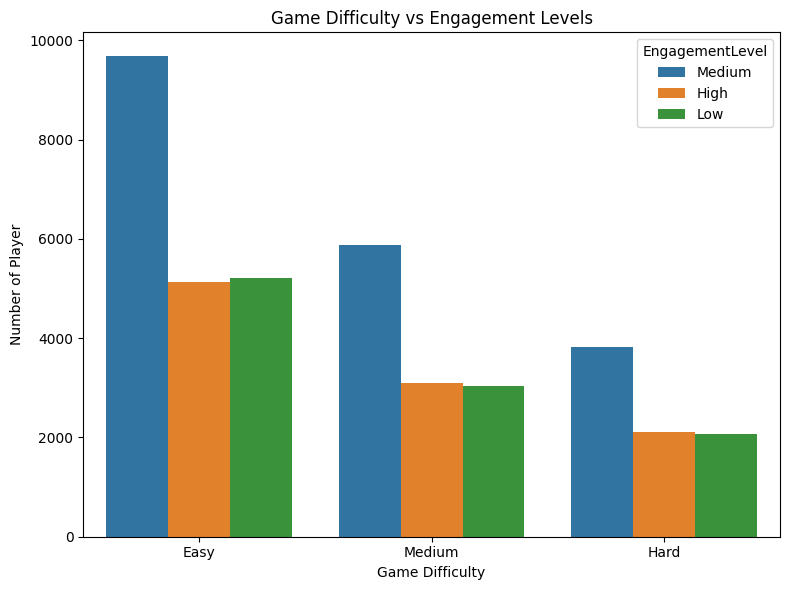

In [25]:
plt.figure(figsize = (8,6))
sns.countplot(
    data = gaming_behavior_df,
    x = "GameDifficulty",
    hue = "EngagementLevel",
    order = gaming_behavior_df["GameDifficulty"].value_counts().index
)

plt.title("Game Difficulty vs Engagement Levels")
plt.xlabel("Game Difficulty")
plt.ylabel("Number of Player")
plt.tight_layout()
plt.show()

**Conclusion:**

As game difficulty increases, the number of players across all engagement levels (high, medium, and low) decreases. The largest concentration of players is found in games with easy difficulty, while medium and especially hard difficulty levels have progressively fewer players.

This indicates that most players prefer easier game difficulties, regardless of their engagement level, and higher difficulty settings tend to attract a smaller overall player base.

**How does engagement level differ between players who make in-game purchases and those who do not?**

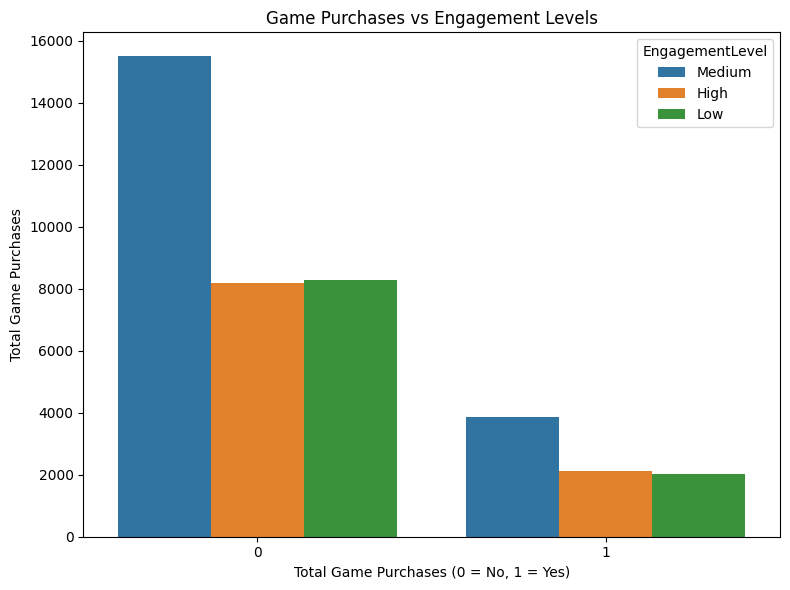

In [26]:
plt.figure(figsize = (8,6))
sns.countplot(
    data = gaming_behavior_df,
    x = "InGamePurchases",
    hue = "EngagementLevel",
    order = gaming_behavior_df["InGamePurchases"].value_counts().index
)

plt.title("Game Purchases vs Engagement Levels")
plt.xlabel("Total Game Purchases (0 = No, 1 = Yes)")
plt.ylabel("Total Game Purchases")
plt.tight_layout()
plt.show()

**Conclusion:**

The visualization shows that most players across all engagement levels do not make in-game purchases (purchase = 0), indicating that non-paying players dominate the dataset regardless of engagement. However, among players who do make purchases (purchase = 1), those with medium and high engagement levels contribute more to total purchases than low-engagement players.

This suggests that while making in-game purchases is not a requirement for high engagement, players with higher engagement levels are more likely to spend money compared to low-engagement players. In other words, engagement appears to be positively associated with purchasing behavior, but engagement itself is driven more by gameplay habits (such as session frequency and duration) rather than purchases alone.


**How does player level vary across different engagement levels?**

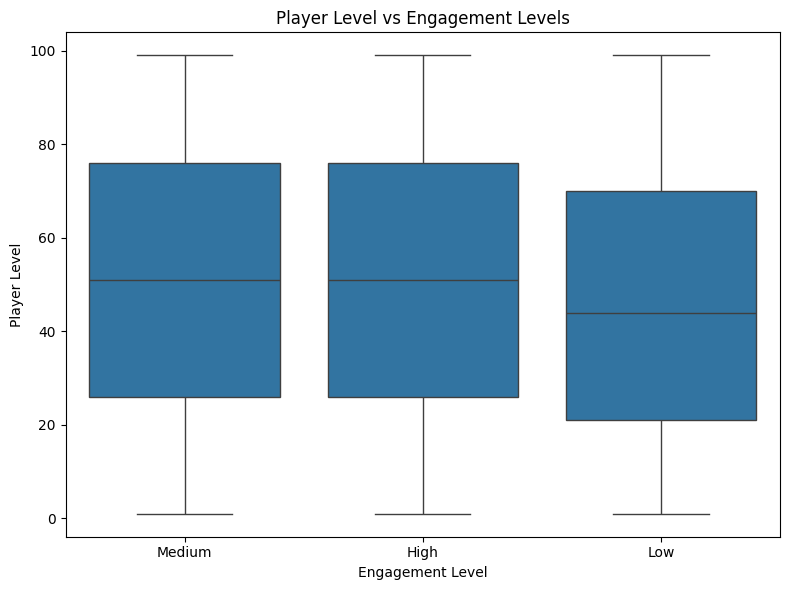

In [27]:
plt.figure(figsize = (8,6))
sns.boxplot(
    data = gaming_behavior_df,
    x = "EngagementLevel",
    y = "PlayerLevel"
)

plt.title("Player Level vs Engagement Levels")
plt.xlabel("Engagement Level")
plt.ylabel("Player Level")
plt.tight_layout()
plt.show()

**Conclusion:**

Players with medium and high engagement levels have similar player level distributions, indicating that both groups tend to reach comparable progression levels in the game. In contrast, players with low engagement generally have lower player levels, as shown by a lower median and overall distribution in the boxplot.

This suggests that maintaining at least a medium level of engagement is associated with higher in-game progression, while low engagement may limit a player’s ability to level up effectively.

**Is there a relationship between the number of achievements unlocked and engagement level?**

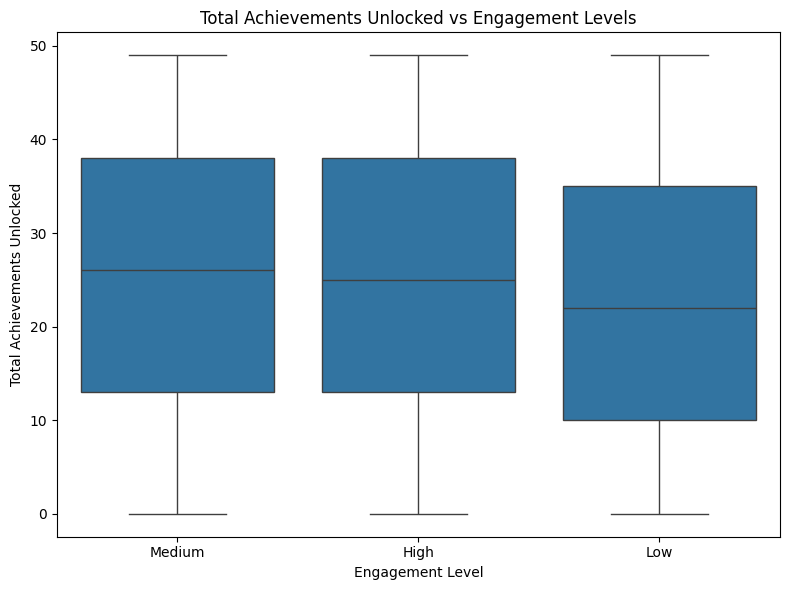

In [28]:
plt.figure(figsize = (8,6))
sns.boxplot(
    data = gaming_behavior_df,
    x = "EngagementLevel",
    y = "AchievementsUnlocked"
)

plt.title("Total Achievements Unlocked vs Engagement Levels")
plt.xlabel("Engagement Level")
plt.ylabel("Total Achievements Unlocked")
plt.tight_layout()
plt.show()

**Conclusion:**

Players with medium and high engagement levels show similar distributions of total achievements unlocked, indicating that both groups tend to unlock a comparable number of achievements. Meanwhile, players with low engagement levels generally unlock slightly fewer achievements, as reflected by a lower median and narrower distribution in the boxplot.

This suggests that higher engagement is associated with greater in-game achievement progression, while lower engagement may limit the number of achievements a player is able to unlock.

**Final Conclusion:**

Based on the visual analysis, player engagement is shaped more by how players play rather than who they are. Demographic factors such as age, gender, and game genre show relatively similar distributions across engagement levels, indicating that engagement does not strongly depend on these characteristics. Most players are adults in their late 20s to early 40s, gaming preferences are diverse across genres, and engagement patterns are consistent across genders and age groups.

Geographical location mainly affects the number of players, not their engagement behavior. Regions like the USA and Europe have more players overall, but medium engagement is the most common level across all locations, suggesting similar engagement tendencies worldwide.

When examining gameplay behavior, clearer patterns emerge. Total PlayTimeHours is relatively similar across engagement levels and does not strongly influence engagement. This is because PlayTimeHours is a cumulative, historical measure that depends on how long an account has existed, not on current or consistent playing habits. As a result, players with very different engagement behaviors can still accumulate similar total play time.

In contrast, SessionsPerWeek and AvgSessionDurationMinutes show a strong relationship with engagement. Players with higher engagement levels tend to play more frequently each week and spend more time per session. These two variables directly reflect behavioral consistency and intensity, making them much stronger indicators of engagement. This explains why engagement increases with higher session frequency and longer session duration, even when total play time does not change significantly.

Additional gameplay-related factors support this pattern. Players with medium and high engagement tend to reach similar player levels and unlock a comparable number of achievements, while low-engagement players generally progress less. This suggests that sustained and consistent play is important for in-game progression.

Regarding game difficulty, most players prefer easy difficulty, regardless of engagement level, and fewer players choose harder difficulties. Finally, while most players do not make in-game purchases, players with higher engagement levels are more likely to spend money than low-engagement players, indicating that engagement and purchasing behavior are positively related, though purchases are not the main driver of engagement.

Overall, the analysis shows that player engagement is driven primarily by consistent and intensive gameplay behavior—how often and how long players play—rather than by total accumulated play time, demographics, or spending alone.

## **MACHINE LEARNING**

In [29]:
X = gaming_behavior_df.drop(columns = ["EngagementLevel", "age_group", "total_play_time"])

engagement_maping = {
    "Low": 0,
    "Medium": 1,
    "High": 2
}
y = gaming_behavior_df["EngagementLevel"].map(engagement_maping)

In [30]:
gaming_behavior_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   PlayerID                   40034 non-null  int64   
 1   Age                        40034 non-null  int64   
 2   Gender                     40034 non-null  object  
 3   Location                   40034 non-null  object  
 4   GameGenre                  40034 non-null  object  
 5   PlayTimeHours              40034 non-null  float64 
 6   InGamePurchases            40034 non-null  int64   
 7   GameDifficulty             40034 non-null  object  
 8   SessionsPerWeek            40034 non-null  int64   
 9   AvgSessionDurationMinutes  40034 non-null  int64   
 10  PlayerLevel                40034 non-null  int64   
 11  AchievementsUnlocked       40034 non-null  int64   
 12  EngagementLevel            40034 non-null  object  
 13  age_group                  3893

In [31]:
categorical_features = [
    "GameDifficulty"
]
numerical_features = [
    "InGamePurchases",
    "SessionsPerWeek",
    "AvgSessionDurationMinutes",
    "PlayerLevel",
    "AchievementsUnlocked",
]

In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers = [
        ("numerical", StandardScaler(), numerical_features),
        ("categorical", OneHotEncoder(handle_unknown = "ignore"), categorical_features)
    ]
)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## **LOGISTIC REGRESSION**

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(
    class_weight="balanced",
    max_iter=1000
)

In [35]:
pipeline = Pipeline(steps = [
    ("preprocessing", preprocessor),
    ("model", logreg)
])

In [36]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['InGamePurchases',
                                                   'SessionsPerWeek',
                                                   'AvgSessionDurationMinutes',
                                                   'PlayerLevel',
                                                   'AchievementsUnlocked']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['GameDifficulty'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [37]:
y_pred_logreg = pipeline.predict(X_test)
y_proba_logreg = pipeline.predict_proba(X_test)

In [38]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [39]:
print("Accuracy Score:", accuracy_score(y_test, y_pred_logreg))

Accuracy Score: 0.786945300141537


In [40]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_logreg

array([[2487,  465,  117],
       [1050, 4137,  623],
       [ 130,  174, 2828]])

In [41]:
print(classification_report(
    y_test,
    y_pred_logreg,
    target_names=["Low", "Medium", "High"]
))

              precision    recall  f1-score   support

         Low       0.68      0.81      0.74      3069
      Medium       0.87      0.71      0.78      5810
        High       0.79      0.90      0.84      3132

    accuracy                           0.79     12011
   macro avg       0.78      0.81      0.79     12011
weighted avg       0.80      0.79      0.79     12011



In [42]:
from sklearn.model_selection import GridSearchCV

param_grid_logreg = {
    "model__C": [0.01, 0.1, 1, 10],
    "model__penalty": ["l1", "l2"],
    "model__solver": ["liblinear"]
}

grid_search_logreg = GridSearchCV(
    pipeline,
    param_grid_logreg,
    cv = 5,
    scoring = "f1_macro",
    n_jobs = -1
)

grid_search_logreg.fit(X_train, y_train)
best_param_logreg = grid_search_logreg.best_params_
print("Best Parameter:", best_param_logreg)

Best Parameter: {'model__C': 0.1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


In [43]:
best_model_logreg = grid_search_logreg.best_estimator_
y_best_pred_logreg = best_model_logreg.predict(X_test)
y_best_proba_logreg = best_model_logreg.predict_proba(X_test)

print(classification_report(y_test, y_best_pred_logreg, target_names = ["Low", "Medium", "High"]))

              precision    recall  f1-score   support

         Low       0.67      0.81      0.74      3069
      Medium       0.87      0.69      0.77      5810
        High       0.77      0.90      0.83      3132

    accuracy                           0.78     12011
   macro avg       0.77      0.80      0.78     12011
weighted avg       0.79      0.78      0.78     12011



In [44]:
cm_best_logreg = confusion_matrix(y_test, y_best_pred_logreg)
cm_best_logreg

array([[2495,  452,  122],
       [1079, 4012,  719],
       [ 133,  169, 2830]])

## **RANDOM FOREST**

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators = 100,
    class_weight = "balanced"
)

In [46]:
pipeline_rf = Pipeline(steps = [
    ("preprocessing", preprocessor),
    ("model", rf)
])

In [47]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['InGamePurchases',
                                                   'SessionsPerWeek',
                                                   'AvgSessionDurationMinutes',
                                                   'PlayerLevel',
                                                   'AchievementsUnlocked']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['GameDifficulty'])])),
                ('model', RandomForestClassifier(class_weight='balanced'))])

In [48]:
y_pred_rf = pipeline_rf.predict(X_test)
y_proba_rf = pipeline_rf.predict_proba(X_test)

In [49]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_rf))

Accuracy Score:  0.9094996253434352


In [50]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      3069
           1       0.91      0.94      0.93      5810
           2       0.92      0.88      0.90      3132

    accuracy                           0.91     12011
   macro avg       0.91      0.90      0.90     12011
weighted avg       0.91      0.91      0.91     12011



In [51]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[2692,  281,   96],
       [ 180, 5484,  146],
       [ 104,  280, 2748]])

In [52]:
param_grid_rf = {
    "model__n_estimators": [400, 500],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2]
}

grid_search_rf = GridSearchCV(
    pipeline_rf,
    param_grid_rf,
    cv = 5,
    scoring = "accuracy",
    n_jobs = -1
)

grid_search_rf.fit(X_train, y_train)
best_param_rf = grid_search_rf.best_params_
print("Best Parameter: ", best_param_rf)

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameter:  {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 400}


In [55]:
best_model_rf = grid_search_rf.best_estimator_
y_best_pred_rf = best_model_rf.predict(X_test)
y_best_proba_rf = best_model_rf.predict_proba(X_test)
print(classification_report(y_test, y_best_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3069
           1       0.91      0.94      0.93      5810
           2       0.92      0.88      0.90      3132

    accuracy                           0.91     12011
   macro avg       0.91      0.90      0.91     12011
weighted avg       0.91      0.91      0.91     12011



In [54]:
cm_best_rf = confusion_matrix(y_test, y_best_pred_rf)
cm_best_rf

array([[2718,  253,   98],
       [ 192, 5466,  152],
       [ 106,  259, 2767]])

## **NEW DATA**

In [56]:
import joblib
joblib.dump(best_model_rf, "engagemen_level_predict.pkl")

['engagemen_level_predict.pkl']

In [57]:
model = joblib.load("engagemen_level_predict.pkl")

In [75]:
session = int(input("Session Per Week: "))
duration = int(input("Avg Session Duration (Minutes): "))
difficulty = input("Game Difficulty (Easy/Medium/Hard): ")
purchase = int(input("In-Game Purchase (0 = No, 1 = Yes): "))
level = int(input("Player Level: "))
achievement = int(input("Achievement Unlocked: "))

new_player = pd.DataFrame({
    "SessionsPerWeek": [session],
    "AvgSessionDurationMinutes": [duration],
    "GameDifficulty": [difficulty],
    "InGamePurchases": [purchase],
    "PlayerLevel": [level],
    "AchievementsUnlocked": [achievement]
})

prediction = model.predict(new_player)

Session Per Week: 10
Avg Session Duration (Minutes): 200
Game Difficulty (Easy/Medium/Hard): Hard
In-Game Purchase (0 = No, 1 = Yes): 1
Player Level: 40
Achievement Unlocked: 39


In [76]:
if (prediction == 0):
  print("Predicted Engagement Level: Low")
elif (prediction == 1):
  print("Predicted Engagement Level: Medium")
else:
  print("Predicted Engagement Level: High")

Predicted Engagement Level: High


In [77]:
# Check how confident the model is when predicting new data
labels = ["Low", "Medium", "High"]

proba = model.predict_proba(new_player)

for label, p in zip(labels, proba[0]):
    print(f"{label}: {p:.2f}")

Low: 0.03
Medium: 0.12
High: 0.85
